## Setup evnironment

In [1]:
import os
import numpy as np
import pandas as pd
import json
from skimage.io import imread

In [2]:
from psf import compute, plotPSF

## Setup plotting

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

In [4]:
from ipywidgets import interactive
from ipywidgets import IntSlider
from IPython.display import display

## Define parameters

In [5]:
FOVumLat = 61.0
FOVpxLat = 512.0 # 512
pxPerUmLat = FOVpxLat/FOVumLat
pxPerUmAx = 2.0 # 2.0
wavelength = 970.0
NA = 0.6
windowUm = [12, 2, 2]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':970.0, 'NA':0.6, 'windowUm':windowUm}
options['thresh'] = .05

In [13]:
options

{'FOVpxLat': 512.0,
 'FOVumLat': 61.0,
 'NA': 0.6,
 'pxPerUmAx': 2.0,
 'pxPerUmLat': 8.39344262295082,
 'thresh': 0.05,
 'wavelength': 970.0,
 'windowUm': [12, 2, 2]}

## Get PSF

In [6]:
im = imread('./data/images.tif', plugin='tifffile')

In [7]:
im

array([[[ 5, 10,  4, ..., 11,  3,  3],
        [ 8,  5,  2, ...,  7,  7,  4],
        [ 3,  1,  5, ...,  3,  5,  3],
        ...,
        [ 4,  5,  2, ...,  8,  9,  3],
        [ 2,  4,  3, ...,  6,  9,  8],
        [ 3,  8,  3, ...,  2,  3,  5]],

       [[ 7,  4,  3, ...,  6,  6,  4],
        [10,  7,  4, ...,  5,  8,  6],
        [ 4,  8,  2, ...,  3,  5,  6],
        ...,
        [ 4,  4,  5, ...,  4, 10,  7],
        [ 5,  3,  4, ...,  5,  2,  6],
        [ 7,  4,  7, ...,  4,  3,  3]],

       [[ 6,  6,  3, ...,  2,  5,  4],
        [10,  5,  4, ...,  9,  7,  5],
        [ 3,  3,  6, ...,  7,  5,  4],
        ...,
        [ 6,  4,  4, ...,  5,  3,  6],
        [ 4,  3,  4, ...,  8,  6,  1],
        [10, 11,  3, ...,  3,  6,  4]],

       ...,

       [[ 2,  5,  6, ...,  3,  5,  3],
        [ 5,  5,  4, ...,  4,  5,  2],
        [ 5,  2,  6, ...,  3,  6,  6],
        ...,
        [ 2,  6,  2, ...,  2,  7,  4],
        [ 2,  3,  4, ..., 13,  5,  5],
        [ 8,  5, 11, ...,  6,  3

In [8]:
data, beads, maxima, centers, smoothed = compute(im, options)

In [9]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
latProfile = [x[1] for x in data]
axProfile = [x[2] for x in data]

In [10]:
PSF

,FWHMlat,FWHMax,Max
0,0.792801,5.659147,120
1,0.994335,4.519212,241
2,1.012285,4.460775,847
3,0.955870,4.509486,262
4,0.957120,4.526076,74
5,0.977617,4.488589,350
6,1.009600,5.046590,300
7,0.927706,4.929884,165
8,0.999875,4.315810,179
9,0.882628,5.202208,123


In [22]:
print(len(PSF))
print(PSF.mean())
print(PSF.std())

14
FWHMlat      0.951830
FWHMax       4.772319
Max        286.214286
dtype: float64
FWHMlat      0.061514
FWHMax       0.425010
Max        212.956904
dtype: float64


## Plot max projection

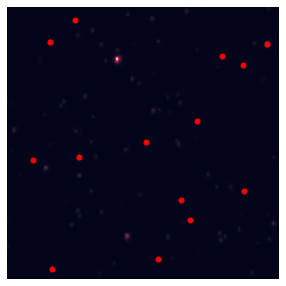

In [23]:
plt.figure(figsize=(5,5));
plt.imshow(smoothed);
plt.plot(centers[:, 2], centers[:, 1], 'r.', ms=10);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off');

## Plot max projection

In [24]:
beadInd = 1
average = beads[beadInd]

In [46]:
simplest = lambda arg: arg
simplest(1)

1

In [53]:
plane = IntSlider(min=0, max=average.shape[0]-1, step=1, value=average.shape[0]/2)

interactive(lambda i: plt.imshow(average[i]), i=plane)

interactive(children=(IntSlider(value=24, description='i', max=47), Output()), _dom_classes=('widget-interact'…

## Plot 2D slices

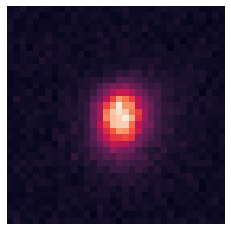

In [54]:
plt.imshow(average.mean(axis=0));
plt.axis('off');

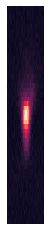

In [55]:
plt.imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

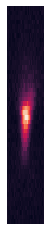

In [31]:
plt.imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

## Plotting

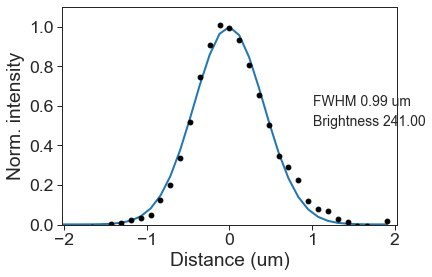

In [32]:
plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])

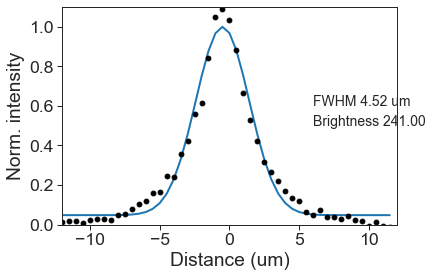

In [33]:
plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])